<a href="https://www.kaggle.com/code/ankushhv/human-activity-recognition?scriptVersionId=133206756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [2]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")

# Exploratory Data Analysis

In [4]:
train_data = pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
test_data = pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [7]:
data.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245     

<Axes: >

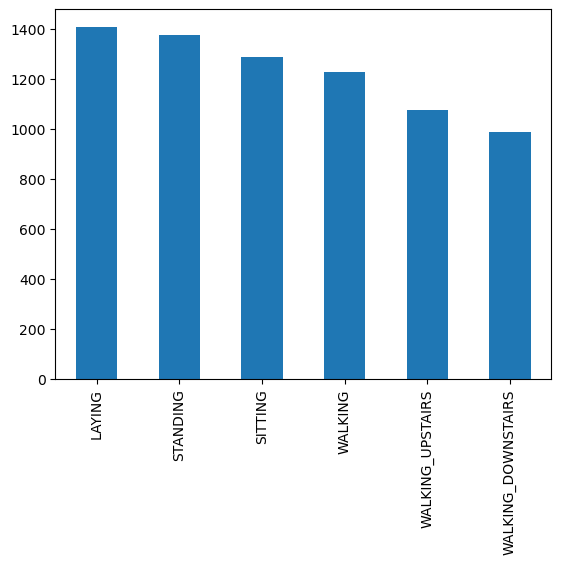

In [8]:
data['Activity'].value_counts().plot(kind = 'bar')

<class 'pandas.core.frame.DataFrame'>
                                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.148061   
tBodyAcc-mean()-Y                              0.148061           1.000000   
tBodyAcc-mean()-Z                             -0.256952          -0.078769   
tBodyAcc-std()-X                               0.000619          -0.045160   
tBodyAcc-std()-Y                              -0.021903          -0.044920   
...                                                 ...                ...   
angle(tBodyGyroJerkMean,gravityMean)           0.028844           0.075679   
angle(X,gravityMean)                          -0.035257          -0.005309   
angle(Y,gravityMean)                           0.034371           0.001053   
angle(Z,gravityMean)                           0.028242          -0.013903   
subject                                        0.024181          -0.003144   

                         

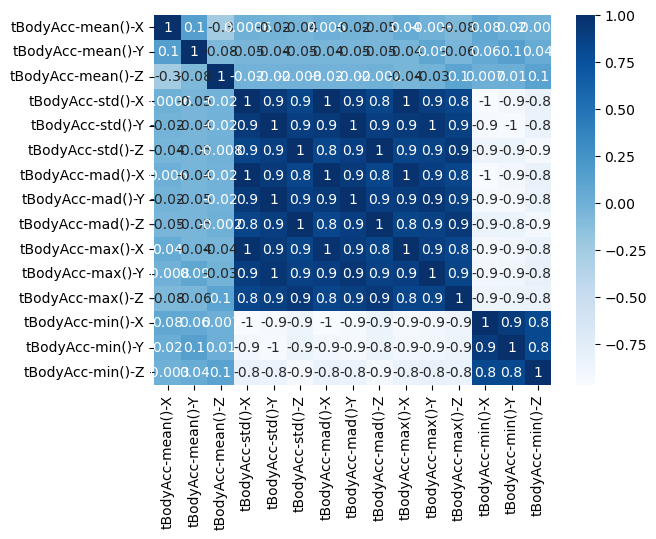

In [9]:
corr = data.corr()
print(type(corr))
heatmap = sns.heatmap(corr.iloc[:15,:15], annot=True, cmap="Blues", fmt='.1g')
print(corr)

# Preparing Training and Testing Data

In [10]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
print(f"Training Data shape: {x_train.shape}\nTesting Data Shape: {x_test.shape}")

Training Data shape: (7352, 561)
Testing Data Shape: (2947, 561)


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [12]:
#Encode target labels with value between 0 and n_classes-1
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(le.classes_)
y_test = le.fit_transform(y_test)

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [13]:
# This estimator scales and translates each feature individually such that it is in the given range on the training set, between zero and one.
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

# Base Model

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [15]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 1.2912 - accuracy: 0.5024 - val_loss: 1.0208 - val_accuracy: 0.5904
Epoch 2/10
115/115 [==============================] - 1s 4ms/step - loss: 0.8573 - accuracy: 0.7243 - val_loss: 0.7119 - val_accuracy: 0.8548
Epoch 3/10
115/115 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.8209 - val_loss: 0.5161 - val_accuracy: 0.8795
Epoch 4/10
115/115 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8619 - val_loss: 0.4250 - val_accuracy: 0.8633
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3666 - accuracy: 0.8847 - val_loss: 0.3734 - val_accuracy: 0.8561
Epoch 6/10
115/115 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.9015 - val_loss: 0.2953 - val_accuracy: 0.9101
Epoch 7/10
115/115 [==============================] - 0s 4ms/step - loss: 0.2680 - accuracy: 0.9159 - val_loss: 0.2703 - val_accuracy: 0.9067
Epoch 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                35968     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 36,358
Trainable params: 36,358
Non-trainable params: 0
_________________________________________________________________


# Hypertuning the model 

In [17]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [18]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [19]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

Trial 5 Complete [00h 03m 02s]
val_accuracy: 0.18221920728683472

Best val_accuracy So Far: 0.9341703653335571
Total elapsed time: 00h 10m 44s


In [20]:
tuner.results_summary()

Results summary
Results in project/Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 4
units0: 512
initializer: uniform
activation: relu
units1: 352
units2: 480
units3: 64
units4: 320
units5: 384
units6: 448
units7: 320
units8: 192
units9: 512
units10: 32
units11: 224
units12: 352
units13: 352
units14: 160
units15: 128
units16: 288
units17: 256
units18: 384
Score: 0.9341703653335571

Trial 0 summary
Hyperparameters:
num_layers: 18
units0: 64
initializer: normal
activation: tanh
units1: 256
units2: 32
units3: 32
units4: 32
units5: 32
units6: 32
units7: 32
units8: 32
units9: 32
units10: 32
units11: 32
units12: 32
units13: 32
units14: 32
units15: 32
units16: 32
units17: 32
Score: 0.3471326728661855

Trial 1 summary
Hyperparameters:
num_layers: 17
units0: 480
initializer: normal
activation: tanh
units1: 192
units2: 128
units3: 160
units4: 416
units5: 512
units6: 384
units7: 64
units8: 224
units9: 

In [21]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values
# best_hps_model = tuner.hypermodel.build(best_hps)

{'num_layers': 4,
 'units0': 512,
 'initializer': 'uniform',
 'activation': 'relu',
 'units1': 352,
 'units2': 480,
 'units3': 64,
 'units4': 320,
 'units5': 384,
 'units6': 448,
 'units7': 320,
 'units8': 192,
 'units9': 512,
 'units10': 32,
 'units11': 224,
 'units12': 352,
 'units13': 352,
 'units14': 160,
 'units15': 128,
 'units16': 288,
 'units17': 256,
 'units18': 384}

In [22]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
230/230 [==============================] - 4s 13ms/step - loss: 0.8130 - accuracy: 0.7779 - val_loss: 0.7668 - val_accuracy: 0.9230
Epoch 2/100
230/230 [==============================] - 3s 11ms/step - loss: 0.8346 - accuracy: 0.7724 - val_loss: 0.7193 - val_accuracy: 0.9260
Epoch 3/100
230/230 [==============================] - 2s 10ms/step - loss: 0.9710 - accuracy: 0.7599 - val_loss: 1.6639 - val_accuracy: 0.8439
Epoch 4/100
230/230 [==============================] - 2s 10ms/step - loss: 0.9388 - accuracy: 0.7620 - val_loss: 0.8146 - val_accuracy: 0.9118
Epoch 5/100
230/230 [==============================] - 3s 12ms/step - loss: 0.8507 - accuracy: 0.7715 - val_loss: 1.1401 - val_accuracy: 0.8904
Epoch 6/100
230/230 [==============================] - 2s 11ms/step - loss: 0.6665 - accuracy: 0.7939 - val_loss: 0.4451 - val_accuracy: 0.9477
Epoch 7/100
230/230 [==============================] - 3s 12ms/step - loss: 0.7181 - accuracy: 0.7918 - val_loss: 1.1033 - val_accuracy:

In [23]:
model.summary()
# import tensorflow as tf
# Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               287744    
                                                                 
 dense_1 (Dense)             (None, 352)               180576    
                                                                 
 dense_2 (Dense)             (None, 480)               169440    
                                                                 
 dense_3 (Dense)             (None, 64)                30784     
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 668,934
Trainable params: 668,934
Non-trai

# Model Performance

Text(0.5, 1.0, 'Training and Validation Accuracy')

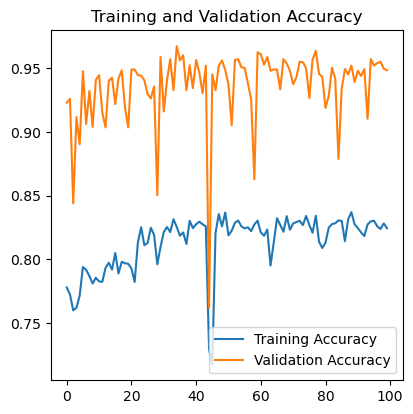

In [24]:
accuracy = history.history['accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
# print(f"Model Accuracy: {accuracy}\nLoss: {loss}\nValidation Loss: {validation_loss}\nValidation Accuracy: {validation_accuracy}")
# plotting model performance
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Saving the Model

In [25]:
import pickle
model_file = "model.pickle"
with open(model_file,'wb') as f:
    pickle.dump(model, f)

{'loss': 0.6828978061676025, 'accuracy': 0.9450288414955139}


Text(0.5, 1.0, 'Training and Validation Accuracy')

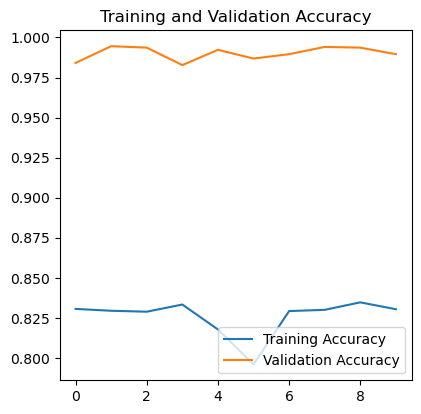

In [26]:
# fit the model
model_file = "model.pickle"
model = pickle.load(open(model_file, 'rb'))
history = model.fit(x_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
print(model.evaluate(x_test, y_test, verbose=0, return_dict=True))
# model performance
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')